In [6]:
# Load inputs
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt

input_dim = 1
output_dim = 1

train_frac = 0.8
valid_frac = 0.1

cpu_all = pd.read_csv('data/data-cpu/1476200716/10.12.3.32-cpu0-1476200968.csv')
cpu_data = (cpu_all.user + cpu_all.system).astype('float32').values



def load_data(data, input_dim, output_dim):
    sample_size = data.size - input_dim - output_dim + 1
    inputs = np.zeros(shape=(sample_size,input_dim), dtype=float)
    outputs = np.zeros(shape=(sample_size,output_dim), dtype=float)
    
    for i in range(sample_size):
        inputs[i] = data[i:i+input_dim]
        outputs[i] = data[i+input_dim:i+input_dim+output_dim]
    return inputs, outputs

def split_data(data, train_frac, valid_frac):
    sample_size = data.shape[0]
    train_size = int(sample_size * train_frac)
    valid_size = int(sample_size * valid_frac)
    train = data[:train_size]
    valid = data[train_size:train_size+valid_size]
    test = data[train_size+valid_size:]
    return train, valid, test

cpu_input, cpu_output = load_data(cpu_data, input_dim, output_dim)

input_train, input_valid, input_test = split_data(cpu_input, train_frac, valid_frac)
output_train, output_valid, output_test = split_data(cpu_output, train_frac, valid_frac)

input_train = np.reshape(input_train, (input_train.shape[0], 1, input_train.shape[1]))
input_valid = np.reshape(input_valid, (input_valid.shape[0], 1, input_valid.shape[1]))

In [11]:
# Construct model
hidden_unit = 20

model = Sequential()
model.add(LSTM(hidden_unit, input_shape=(1, input_dim), init='glorot_uniform', inner_init='orthogonal', forget_bias_init='one',\
               activation='relu', inner_activation='sigmoid', W_regularizer=None, U_regularizer=None, b_regularizer=None,\
               dropout_W=0.0, dropout_U=0.0))

model.add(Dense(output_dim))
model.compile(loss='mean_squared_error', optimizer='RMSprop')
#print model.get_config()
model.fit(input_train, output_train, nb_epoch=30, batch_size=30, verbose=0)
prediction = model.predict(input_valid)

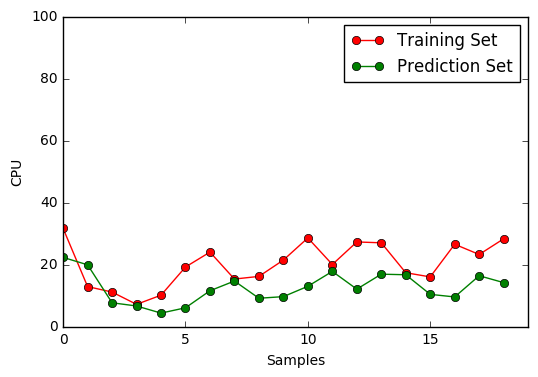

In [12]:
# Plot training and validation
iteration = np.arange(output_valid.shape[0])
                 
plt.plot(iteration, np.reshape(output_valid,(1,-1))[0], '-ro', label='Training Set')
plt.plot(iteration, np.reshape(prediction,(1,-1))[0], '-go', label='Prediction Set')
plt.axis([0, output_valid.shape[0], 0, 100])
plt.legend(loc='upper right')
plt.xlabel('Samples')
plt.ylabel('CPU')
plt.show()